In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_raw = pd.read_csv('schizophrenia_dataset.csv', low_memory= False)
df_raw.head()

,Hasta_ID,Yaş,Cinsiyet,Eğitim_Seviyesi,Medeni_Durum,Meslek,Gelir_Düzeyi,Yaşadığı_Yer,Tanı,Hastalık_Süresi,Hastaneye_Yatış_Sayısı,Ailede_Şizofreni_Öyküsü,Madde_Kullanımı,İntihar_Girişimi,Pozitif_Semptom_Skoru,Negatif_Semptom_Skoru,GAF_Skoru,Sosyal_Destek,Stres_Faktörleri,İlaç_Uyumu
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [3]:
new_name = ['patient_id', 'age','gender','education_level', 'marital_status','widowed_occupation',
            'income_level','living_area','diagnosis','disease_duration','hospitalizations',
            'family_history','substance_use','suicide_attempt','positive_syndrom_score',
            'negative_syndrom_score','gaf_score','social_support','stress_factors','medication_adherence']
df_raw.columns = new_name
df_raw.head()

,patient_id,age,gender,education_level,marital_status,widowed_occupation,income_level,living_area,diagnosis,disease_duration,hospitalizations,family_history,substance_use,suicide_attempt,positive_syndrom_score,negative_syndrom_score,gaf_score,social_support,stress_factors,medication_adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   patient_id              10000 non-null  int64
 1   age                     10000 non-null  int64
 2   gender                  10000 non-null  int64
 3   education_level         10000 non-null  int64
 4   marital_status          10000 non-null  int64
 5   widowed_occupation      10000 non-null  int64
 6   income_level            10000 non-null  int64
 7   living_area             10000 non-null  int64
 8   diagnosis               10000 non-null  int64
 9   disease_duration        10000 non-null  int64
 10  hospitalizations        10000 non-null  int64
 11  family_history          10000 non-null  int64
 12  substance_use           10000 non-null  int64
 13  suicide_attempt         10000 non-null  int64
 14  positive_syndrom_score  10000 non-null  int64
 15  negative_syndrom_sco

In [5]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
age,10000.0,48.8677,18.215054,18.0,33.00,49.0,65.00,80.0
gender,10000.0,0.5026,0.500018,0.0,0.00,1.0,1.00,1.0
education_level,10000.0,3.0426,1.423021,1.0,2.00,3.0,4.00,5.0
marital_status,10000.0,1.5182,1.117315,0.0,1.00,2.0,3.00,3.0
widowed_occupation,10000.0,1.5106,1.114097,0.0,1.00,2.0,3.00,3.0
income_level,10000.0,0.9969,0.817531,0.0,0.00,1.0,2.00,2.0
living_area,10000.0,0.4994,0.500025,0.0,0.00,0.0,1.00,1.0
diagnosis,10000.0,0.2887,0.453181,0.0,0.00,0.0,1.00,1.0
disease_duration,10000.0,5.8590,11.066814,0.0,0.00,0.0,5.25,40.0


In [6]:
df_raw.isnull().sum()

,0
patient_id,0
age,0
gender,0
education_level,0
marital_status,0
widowed_occupation,0
income_level,0
living_area,0
diagnosis,0
disease_duration,0


In [7]:
df = df_raw.copy()

In [8]:
df.head()

,patient_id,age,gender,education_level,marital_status,widowed_occupation,income_level,living_area,diagnosis,disease_duration,hospitalizations,family_history,substance_use,suicide_attempt,positive_syndrom_score,negative_syndrom_score,gaf_score,social_support,stress_factors,medication_adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


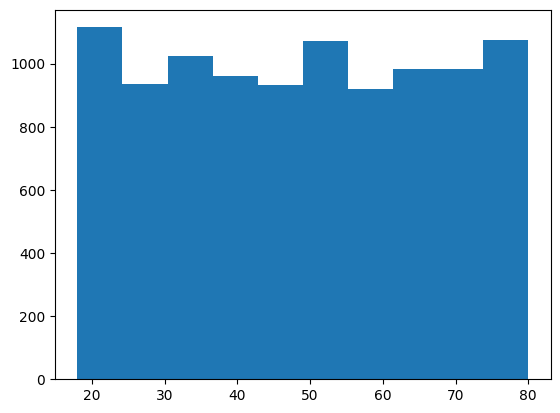

In [9]:
plt.hist(df['age'])

plt.show()

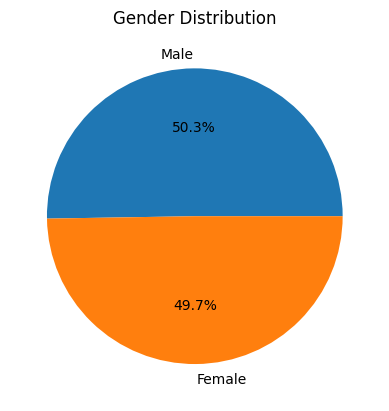

In [10]:
plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

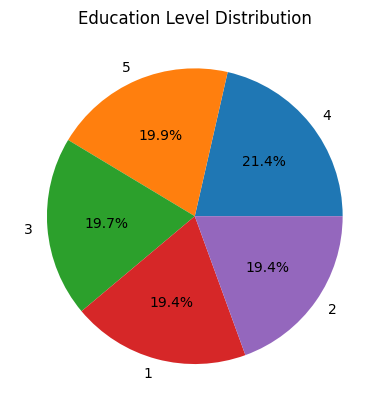

In [11]:
plt.pie(df['education_level'].value_counts(), labels=df['education_level'].unique(), autopct='%1.1f%%')
plt.title('Education Level Distribution')

plt.show()

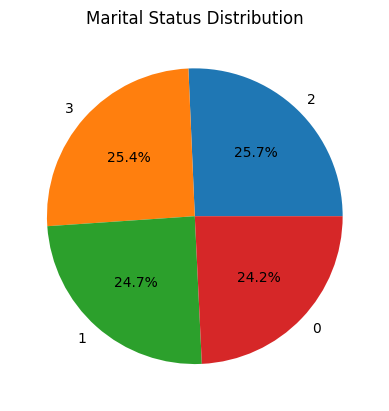

In [12]:
plt.pie(df['marital_status'].value_counts(), labels=df['marital_status'].unique(), autopct='%1.1f%%')
plt.title('Marital Status Distribution')

plt.show()

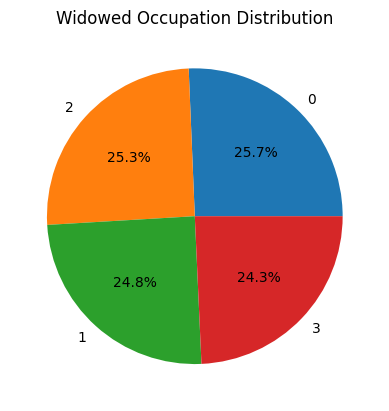

In [13]:
plt.pie(df['widowed_occupation'].value_counts(), labels=df['widowed_occupation'].unique(), autopct='%1.1f%%')
plt.title('Widowed Occupation Distribution')

plt.show()

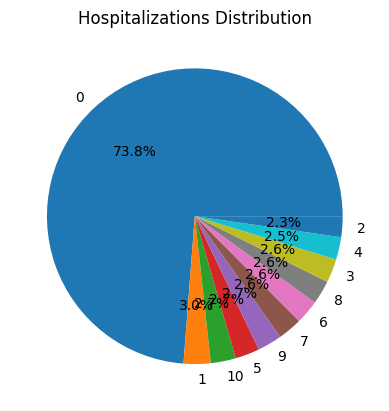

In [14]:
plt.pie(df['hospitalizations'].value_counts(), labels=df['hospitalizations'].unique(), autopct='%1.1f%%')
plt.title('Hospitalizations Distribution')

plt.show()

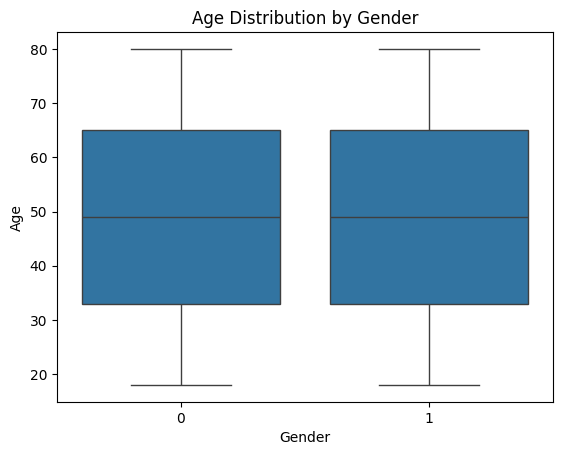

In [15]:
sns.boxplot(y=df['age'],x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

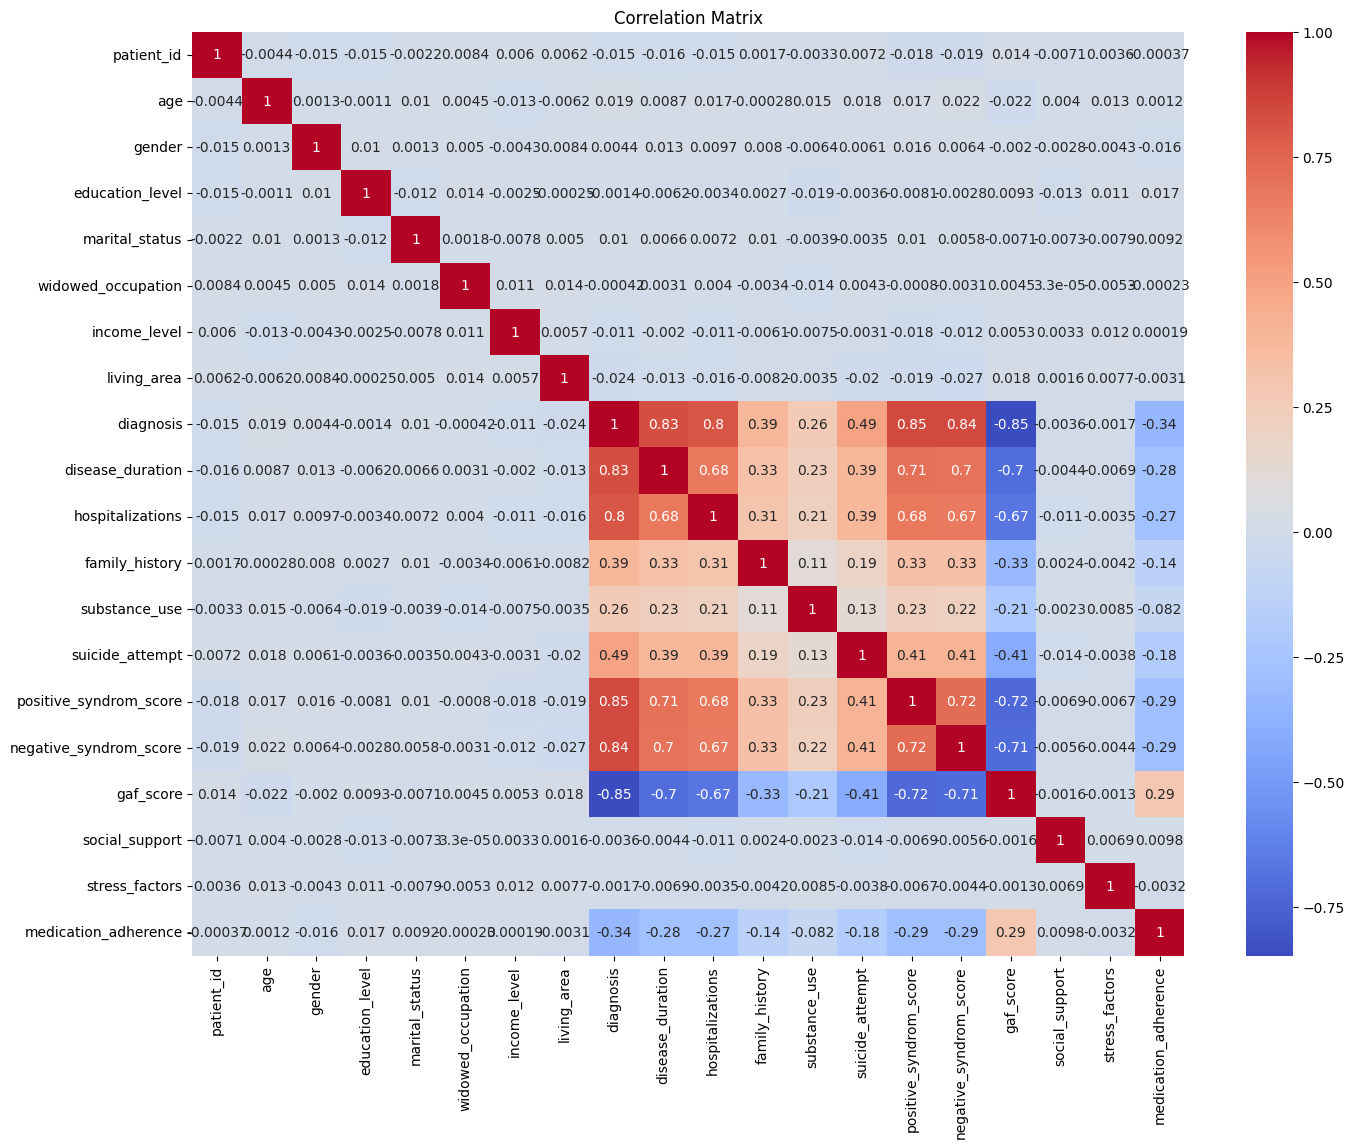

In [16]:
figsize = (16, 12)
plt.figure(figsize=figsize)
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
df.drop('patient_id',axis=1, inplace=True)
data = df
target = df.pop('diagnosis')
target.sample()


,diagnosis
201,0


In [18]:
data.head()

,age,gender,education_level,marital_status,widowed_occupation,income_level,living_area,disease_duration,hospitalizations,family_history,substance_use,suicide_attempt,positive_syndrom_score,negative_syndrom_score,gaf_score,social_support,stress_factors,medication_adherence
0,72,1,4,2,0,2,1,0,0,0,0,0,32,48,72,0,2,2
1,49,1,5,2,2,1,0,35,1,1,1,1,51,63,40,2,2,0
2,53,1,5,3,2,1,0,32,0,1,0,0,72,85,51,0,1,1
3,67,1,3,2,0,2,0,0,0,0,1,0,10,21,74,1,1,2
4,54,0,1,2,0,2,1,0,0,0,0,0,4,27,98,0,1,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



sc = MinMaxScaler()
sc.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegressionCV(cv=5, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}
kf = KFold(n_splits=5, shuffle=True, random_state= 42)

for model_name, model in models.items():
  scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
  print(f'{model_name} Accuracy: {scores.mean()}')





Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 1.0


In [26]:
lr = LogisticRegressionCV(cv=5, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9995

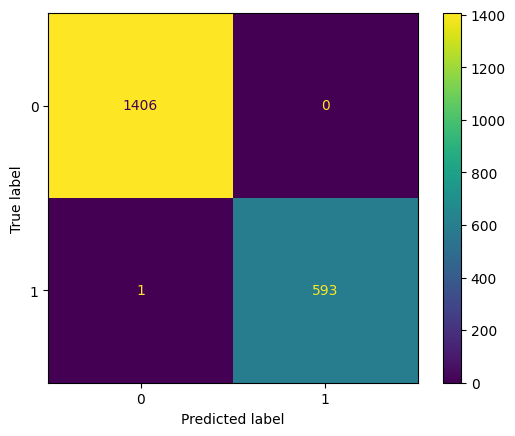

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()